In [59]:
# -*- coding: utf-8 -*-

import csv
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt

In [2]:

path1 = './input/train.txt'
path2 = './input/valid.txt'
path3 = './input/test.txt'

col_name = ['CATEGORY','TITLE']

train_df = pd.read_csv( path1, sep='\t', header=None, names=col_name)
valid_df = pd.read_csv( path2, sep='\t', header=None, names=col_name)
test_df = pd.read_csv( path3, sep='\t', header=None, names=col_name)


In [68]:
def Vect(vectorizer=None):
    X_train = vectorizer.fit_transform(train_df['TITLE'])
    X_valid = vectorizer.transform(valid_df['TITLE'])
    X_test = vectorizer.transform(test_df['TITLE'])
    return X_train,X_test,X_valid,vectorizer

In [47]:
def Learn(f=LogisticRegression()):
    clf = f
    clf.fit(X_train, train_df['CATEGORY'])
    return clf

In [18]:
#予測
dic = {'b':'business', 't':'science and technology', 'e' : 'entertainment', 'm' : 'health'}
def predict(text,clf,vectorizer):
    text = [text]
    X = vectorizer.transform(text)
    ls_proba = clf.predict_proba(X)
    for proba in ls_proba:
        for c, p in zip(clf.classes_, proba):
            print (dic[c]+':',p)


In [53]:
def Print(data_df,data,clf):
    y_pred = clf.predict(data)
    y = data_df['CATEGORY']
    acc = accuracy_score(y, y_pred)
    print('accuracy',acc)
    print('precision',precision_score(y, y_pred,average='macro'))
    print('recall',recall_score(y, y_pred,average='macro'))
    print('F1',f1_score(y, y_pred, average='macro'))
    return acc


In [44]:
vectorizer = CountVectorizer()#単語からベクトル変換
X_train,X_test,X_test,vectorizer = Vect(vectorizer)
clf = Learn()
Print(train_df,X_train,clf)
Print(test_df,X_test,clf)
len(vectorizer.get_feature_names())

C:\Users\n_hay\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


accuracy 0.9964392803598201
precision 0.9966486276811982
recall 0.9939338435748402
F1 0.9952842071266861
accuracy 0.9047976011994003
precision 0.8784970246400311
recall 0.8192379918245828
F1 0.8445876738502733


12936

In [45]:
vectorizer = CountVectorizer(ngram_range = (1,2))#単語からベクトル変換
X_train,X_test,X_test,vectorizer = Vect(vectorizer)
clf = Learn()
Print(train_df,X_train,clf)
Print(test_df,X_test,clf)
len(vectorizer.get_feature_names())

accuracy 0.9990629685157422
precision 0.9989835936339623
recall 0.998705537753568
F1 0.9988444482686808
accuracy 0.9032983508245878
precision 0.898386591945726
recall 0.789244303312275
F1 0.830216466831279


76180

In [46]:
vectorizer = CountVectorizer(ngram_range = (1,3))#単語からベクトル変換
X_train,X_test,X_test,vectorizer = Vect(vectorizer)
clf = Learn()
Print(train_df,X_train,clf)
Print(test_df,X_test,clf)
len(vectorizer.get_feature_names())

accuracy 0.9991566716641679
precision 0.9990395811496395
recall 0.9989109609253017
F1 0.998975108454335
accuracy 0.8950524737631185
precision 0.8942050965693455
recall 0.7670994631658041
F1 0.8117015121231124


152047

In [69]:
vectorizer = CountVectorizer()#単語からベクトル変換
X_train,X_test,X_valid,vectorizer = Vect(vectorizer)
train_acc_list = []
test_acc_list = []
valid_acc_list = []
for c in range(1,10000,1000):
    print(c)
    f = LogisticRegression(C=c)
    clf = Learn(f)
    acc = Print(train_df,X_train,clf)
    train_acc_list.append(acc)
    acc = Print(test_df,X_test,clf)
    test_acc_list.append(acc)
    acc = Print(valid_df,X_valid,clf)
    valid_acc_list.append(acc)

1


C:\Users\n_hay\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


accuracy 0.9964392803598201
precision 0.9966486276811982
recall 0.9939338435748402
F1 0.9952842071266861
accuracy 0.9047976011994003
precision 0.8784970246400311
recall 0.8192379918245828
F1 0.8445876738502733
accuracy 0.9227886056971514
precision 0.9090244552118678
recall 0.8489121062374096
F1 0.8742706946450769
1001


C:\Users\n_hay\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


accuracy 0.9991566716641679
precision 0.9984696377618255
recall 0.9994849339997773
F1 0.9989760643248979
accuracy 0.9032983508245878
precision 0.8605259745583347
recall 0.8329629058520026
F1 0.845738557326242
accuracy 0.9190404797601199
precision 0.8900201056941894
recall 0.8568411557434502
F1 0.8718691844915579
2001


C:\Users\n_hay\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


accuracy 0.9991566716641679
precision 0.9987699013289053
recall 0.9991812749648262
F1 0.9989753166048593
accuracy 0.9032983508245878
precision 0.8558651570165512
recall 0.8383484903567183
F1 0.8465814296392887
accuracy 0.9197901049475262
precision 0.884894810897076
recall 0.863229712838529
F1 0.8733205623983853
3001


C:\Users\n_hay\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


accuracy 0.9991566716641679
precision 0.9989072332621916
recall 0.9990429196698972
F1 0.9989749141206876
accuracy 0.9047976011994003
precision 0.8614174229634477
recall 0.8392618029473016
F1 0.8496750581219905
accuracy 0.9167916041979011
precision 0.8804609859952843
recall 0.8591053471228067
F1 0.8690439014688988
4001


C:\Users\n_hay\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


accuracy 0.9991566716641679
precision 0.9988838383052852
recall 0.999068565109583
F1 0.9989754706182796
accuracy 0.9032983508245878
precision 0.8630018381574683
recall 0.8320815579541052
F1 0.8463844724358062
accuracy 0.9160419790104948
precision 0.8764164745736114
recall 0.8597238259945204
F1 0.8674944141786812
5001


C:\Users\n_hay\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


accuracy 0.9991566716641679
precision 0.9989034732306277
recall 0.9990467694477677
F1 0.9989749061784357
accuracy 0.9032983508245878
precision 0.860837148168654
recall 0.8331894185179722
F1 0.8460728937965306
accuracy 0.9160419790104948
precision 0.8767426806867336
recall 0.8609375941104623
F1 0.868260026930035
6001


C:\Users\n_hay\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


accuracy 0.9991566716641679
precision 0.9990434467408111
recall 0.9989071111474312
F1 0.9989751163606805
accuracy 0.9032983508245878
precision 0.8689288155447025
recall 0.830468786436875
F1 0.8479571362603854
accuracy 0.9182908545727136
precision 0.8817909979695036
recall 0.8576204426249633
F1 0.8689178064837491
7001


C:\Users\n_hay\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


accuracy 0.9991566716641679
precision 0.9988874433869449
recall 0.9990647153317125
F1 0.9989754786156368
accuracy 0.9047976011994003
precision 0.8631503525202321
recall 0.8352105916724226
F1 0.8482336186486654
accuracy 0.9145427286356822
precision 0.876241439924424
recall 0.8577466514706329
F1 0.8662995215600222
8001


C:\Users\n_hay\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


accuracy 0.9991566716641679
precision 0.9991966633507168
recall 0.9987533567410204
F1 0.9989747453582694
accuracy 0.9055472263868066
precision 0.870714303757631
recall 0.836409396721915
F1 0.8521279212720709
accuracy 0.9175412293853074
precision 0.8813500808619197
recall 0.8571675440742387
F1 0.8684709789591735
9001


C:\Users\n_hay\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


accuracy 0.9991566716641679
precision 0.9987581354403084
recall 0.9991928242984376
F1 0.9989752929360597
accuracy 0.9047976011994003
precision 0.8672086668777055
recall 0.834817040034017
F1 0.8497489574202384
accuracy 0.9130434782608695
precision 0.8729204658012673
recall 0.8543856921628561
F1 0.8629279643728952


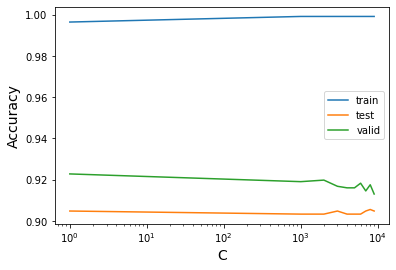

In [70]:
plt.plot(range(1,10000,1000), train_acc_list, label='train')
plt.plot(range(1,10000,1000), test_acc_list, label='test')
plt.plot(range(1,10000,1000), valid_acc_list, label='valid')
plt.xscale('log')
plt.xlabel('C', fontsize = 14)
plt.ylabel('Accuracy', fontsize = 14)
plt.legend()

In [71]:
np.logspace(-5, 4, 10, base=10)

array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04])

In [72]:
1.e-05

1e-05